In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import torch

import linop

In [2]:
foo = np.array([1,2,3,4,5])
foo[np.where(foo // 2 == 1)]

array([2, 3])

In [2]:
x = torch.randn((3, 3))
print(x)

tensor([[-0.2489,  0.4854,  0.1258],
        [-0.3511,  1.3512, -1.1185],
        [ 0.4819,  1.2337,  1.0993]])


In [5]:
x = (x - torch.mean(x, dim=1, keepdim=True))/ (torch.std(x, dim=1, keepdim=True) + 1e-5)
print(x)

tensor([[ 0.0770, -1.0363,  0.9592],
        [-0.3749,  1.1333, -0.7584],
        [ 0.8202, -1.1139,  0.2938]])


In [3]:
x = torch.randn(1,100)

size = 19

conv = torch.nn.Conv1d(1,1,size,padding=size//2,padding_mode='circular')
conv.weight.data = torch.randn(1,1,size)/torch.sqrt(torch.tensor(size))

print(torch.norm(x))
print(torch.norm(conv(x)))
print(conv(x).shape)

tensor(10.0468)
tensor(12.2565, grad_fn=<LinalgVectorNormBackward0>)
torch.Size([1, 100])


In [11]:
x = torch.randn(100,dtype=torch.float64)
print(x.norm())
x = x.repeat(3,1)

conv = linop.RandomConvolution(shape=(100,), kernel_size=19)

y = conv.apply(x)
print(y[0].norm())
print(y[0,0:10])
print(y[1,0:10])
print(y[2,0:10])

tensor(9.5434, dtype=torch.float64)
tensor(11.2470, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor([ 0.1567,  0.3389,  0.3556, -0.0651,  0.7106,  0.2515, -0.1805, -0.0232,
        -0.3713, -0.0750], dtype=torch.float64, grad_fn=<SliceBackward0>)
tensor([ 0.1567,  0.3389,  0.3556, -0.0651,  0.7106,  0.2515, -0.1805, -0.0232,
        -0.3713, -0.0750], dtype=torch.float64, grad_fn=<SliceBackward0>)
tensor([ 0.1567,  0.3389,  0.3556, -0.0651,  0.7106,  0.2515, -0.1805, -0.0232,
        -0.3713, -0.0750], dtype=torch.float64, grad_fn=<SliceBackward0>)


In [18]:
model = linop.StructuredRandom(shape=(100, 100), n_layers=2)

In [ ]:
np.append(np.empty(0), np.array([1,2,3,4]))

[1 2 3 4]


0.9999981130396218


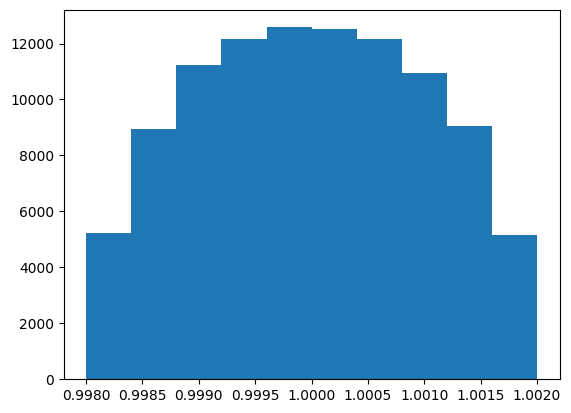

In [40]:
marchenko = linop.MarchenkoPastur(alpha=1000000.0)
samples = marchenko.sample(100000, normalized=True)
print(samples.var() + samples.mean()**2)
plt.hist(samples)
plt.show()

In [5]:
model = linop.Rademacher((10,10),dtype=torch.float32,device='cpu')
model.values

tensor([[ 1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.],
        [-1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.],
        [-1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.],
        [ 1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.],
        [ 1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.],
        [ 1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.],
        [ 1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
        [-1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.],
        [ 1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.]])

In [16]:
x = torch.randn((3,100, 100))
y = model.apply(x)

In [10]:
import os
print(os.getcwd())

/home/zhhu/workspaces/reservoir-frontier


In [11]:
save = 'bar'
foo = np.array([[1,2,3],[4,5,6]])
if not os.path.exists("data/" + f'{save}'):
    os.makedirs("data/" + f'{save}')
np.save("data/" + f'{save}' + "/" + "foo.npy", foo)

In [6]:
now = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
print(now)

20250306132302


In [17]:
y.shape

torch.Size([3, 100, 100])

In [1]:
a = None
print(f'this is {a}')

this is None


In [10]:
import torch
import torch.nn.functional as F

# Example tensor
x = torch.randn(1000, 100)

# Normalize along the second dimension (dim=1)
x_normalized = F.normalize(x, p=2, dim=1)
print(x_normalized[8].norm())

tensor(1.)
